
Epoch 00183: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.

Epoch 00197: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.

Epoch 00202: ReduceLROnPlateau reducing learning rate to 9.999999019782991e-06.

Epoch 00207: ReduceLROnPlateau reducing learning rate to 9.99999883788405e-07.

Epoch 00212: ReduceLROnPlateau reducing learning rate to 9.99999883788405e-08.

Epoch 00217: ReduceLROnPlateau reducing learning rate to 9.999998695775504e-09.

Epoch 00222: ReduceLROnPlateau reducing learning rate to 9.99999905104687e-10.

Epoch 00227: ReduceLROnPlateau reducing learning rate to 9.999998606957661e-11.

Epoch 00232: ReduceLROnPlateau reducing learning rate to 9.99999874573554e-12.

Epoch 00237: ReduceLROnPlateau reducing learning rate to 9.999999092680235e-13.

Epoch 00242: ReduceLROnPlateau reducing learning rate to 9.9999988758398e-14.

Epoch 00247: ReduceLROnPlateau reducing learning rate to 9.999999146890344e-15.

Epoch 00252: ReduceLROnPlateau re

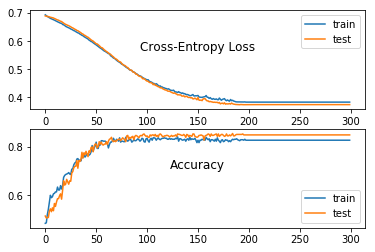

In [3]:
# example of a learning rate schedule
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau
from matplotlib import pyplot
# generate dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# define learning rate schedule
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_delta=1E-7, verbose=1)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0, callbacks=[rlrp])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()